In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Overfitting

In [2]:
train = pd.read_csv('train.csv')
train

,x,y
0,7.127868,4.695017
1,-1.427134,1.184627
2,7.168831,4.671386
3,-4.940390,1.758916
4,-5.792271,2.064704
5,0.255292,0.624571
6,-0.744530,0.971312
7,9.070997,7.444385
8,-3.064917,1.483040
9,1.959275,1.423652


<AxesSubplot:xlabel='x', ylabel='y'>

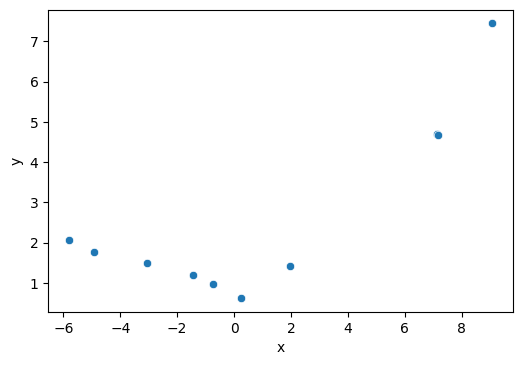

In [3]:
plt.figure(figsize = (6, 4), dpi = 100)
sns.scatterplot(x = 'x', y = 'y', data = train)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
def polynomial_design_matrix(X, n):
    polynomial_features = np.empty(shape = (X.shape[0], n))
    for i in range(1, n + 1):
        polynomial_features[:, i - 1] = X**i
    return polynomial_features

In [6]:
polynomial_design_matrix(train['x'], 2)

array([[ 7.12786780e+00,  5.08064994e+01],
       [-1.42713404e+00,  2.03671157e+00],
       [ 7.16883095e+00,  5.13921372e+01],
       [-4.94038991e+00,  2.44074524e+01],
       [-5.79227110e+00,  3.35504045e+01],
       [ 2.55292364e-01,  6.51741910e-02],
       [-7.44529526e-01,  5.54324215e-01],
       [ 9.07099700e+00,  8.22829865e+01],
       [-3.06491740e+00,  9.39371865e+00],
       [ 1.95927485e+00,  3.83875794e+00]])

6.1024160027378645e-09

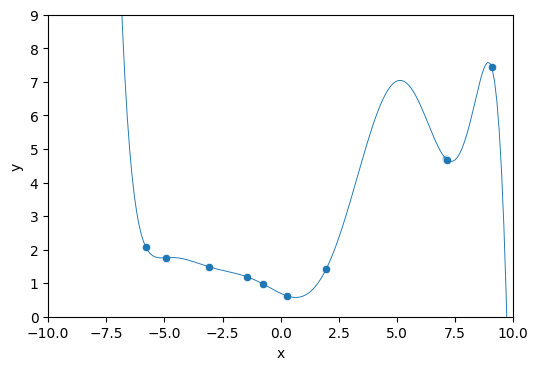

In [7]:
plt.figure(figsize = (6, 4), dpi = 100)
ax = sns.scatterplot(x = 'x', y = 'y', data = train)

n = 9
model = LinearRegression(fit_intercept = True)
X_poly = polynomial_design_matrix(train['x'], n)
model.fit(X_poly, train['y'])
rmse = np.sqrt(np.mean((model.predict(X_poly) - train['y'])**2))

x_to_plot = np.arange(-10, 10.1, .1)
x_to_plot_poly = polynomial_design_matrix(x_to_plot, n)
fitted_line = x_to_plot_poly @ model.coef_ + model.intercept_
ax = sns.lineplot(x = x_to_plot, y = fitted_line, ax = ax, lw = 2/3)
ax.set_ylim(0, 9)
ax.set_xlim(-10, 10);

rmse

In [8]:
rmses = []
for n in range(1, 10):
    model = LinearRegression(fit_intercept = True)
    X_poly = polynomial_design_matrix(train['x'], n)
    model.fit(X_poly, train['y'])
    rmse = np.sqrt(np.mean((model.predict(X_poly) - train['y'])**2))
    print(n, rmse)
    rmses.append(rmse)

1 1.2506895836230856
2 0.25538584218499394
3 0.1470270907185259
4 0.14614304364333902
5 0.13854530489262495
6 0.07189482017386775
7 0.02014778411746299
8 0.014700396694077873
9 6.1024160027378645e-09


In [9]:
test = pd.read_csv('test.csv')
test.head()

,x,y
0,0.868099,1.026507
1,-4.432612,1.655747
2,-1.509648,1.256400
3,6.895523,4.313916
4,-9.905623,2.784235


110.77107676950251

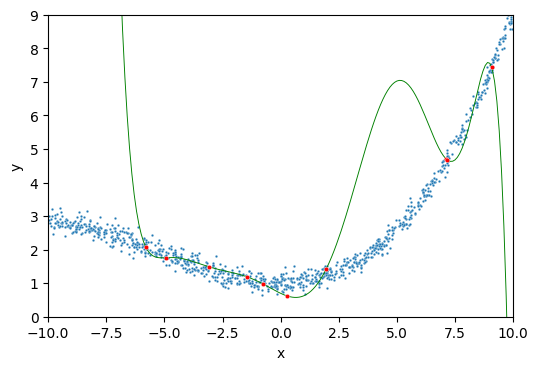

In [10]:
plt.figure(figsize = (6,4), dpi = 100)
ax = sns.scatterplot(x = train['x'], y = train['y'], s = 10, color = 'red', zorder = 10)
ax = sns.scatterplot(x = test['x'], y = test['y'], s = 3, zorder = 1)

n = 9
model = LinearRegression(fit_intercept = True)
X_poly = polynomial_design_matrix(train['x'], n)
model.fit(X_poly, train['y'])

x_to_plot_poly = polynomial_design_matrix(x_to_plot, n)
fitted_line = x_to_plot_poly @ model.coef_ + model.intercept_
ax = sns.lineplot(x = x_to_plot, y = fitted_line, lw = 2/3, color = 'green')
ax.set_xlim(-10, 10)
ax.set_ylim(0, 9)

X_test_poly = polynomial_design_matrix(test['x'], n)
test_rmse = np.sqrt(np.mean((model.predict(X_test_poly) - test['y'])**2))
test_rmse

In [11]:
test_rmses = []
for n in range(1, 10):
    model = LinearRegression(fit_intercept = True)
    X_poly = polynomial_design_matrix(train['x'], n)
    model.fit(X_poly, train['y'])
    X_test_poly = polynomial_design_matrix(test['x'], n)
    test_rmse = np.sqrt(np.mean((model.predict(X_test_poly) - test['y'])**2))
    print(n, test_rmse)
    test_rmses.append(test_rmse)

1 1.8585554486548226
2 0.7713562614108714
3 0.1691290033322484
4 0.20723955870789773
5 1.2974799641183905
6 8.775129060776468
7 13.649732852088503
8 27.666588565625528
9 110.77107676950251
